In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

archivos = ["petrol_consumption", "Admission_Predict"]

In [256]:
def leer_datos(filename, sp ='\t'):
    data = pd.read_csv(filename+".csv", sep = sp, dtype=float)
    return np.array(data.iloc[:,:])

def normalizar_datos(datos):
    media = datos.mean(axis=0)
    desv_est = datos.std(axis=0)
    datos = (datos - media)/ desv_est
    return datos, media, desv_est

def crear_entrenamiento_prueba(datos):
    n = int(datos.shape[0] * 0.7)
    entrenamiento, prueba = datos[:n,:], datos[n:,:]
    return entrenamiento, prueba

def Crear_Archivos_E_P(data, name):
    entrenamiento, prueba = Crear_Entrenamiento_Prueba(data)
    df = pd.DataFrame(entrenamiento)
    df.to_csv(name+"_train.csv", header = False, index = False)
    df = pd.DataFrame(prueba)
    df.to_csv(name+"_test.csv", header = False, index = False)
    return print("hecho")

def calcular_costo(X, y, t):
    costo = np.matmul(X,t)
    costo = np.square(costo-y)
    costo = np.sum(costo)
    costo = costo / (2 * y.shape[0])
    return costo

def gradiente_descendiente(X, y, t, num_it, tasa_apren):
    costos = np.zeros(num_it)
    for i in range(num_it):
        aux = np.matmul(X, t) - y
        aux = np.matmul(np.transpose(X), aux)
        aux = np.divide(aux, y.shape[0])
        aux = np.multiply(aux, tasa_apren)
        t = t - aux
        costos[i] = calcular_costo(X, y, t)
    return t, costos

def ecuacion_normal(X, y):
    X_t = np.transpose(X)
    return np.matmul(np.linalg.inv(np.matmul(X_t, X)), np.matmul(X_t, y))

In [327]:
def Experimento1():
    print("Experimento 1:\n") #Encontrar los valores para θ usando la Ecuacion Normal
    #leemos los datos de entrenamiento y prueba
    train = Leer_Datos(archivos[0] + "_train", ',')
    test = Leer_Datos(archivos[0] + "_test", ',')
    
    #Normalizamos los datos
    train_nor = Normalizar_Datos(train)
    test_nor = Normalizar_Datos(test)
    
    #dividimos en X & y
    X_train = train_nor[:,:-1]
    y_train = train_nor[:,-1:]
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    
    X_test = test_nor[:,:-1]
    y_test = test_nor[:,-1:]
    
    #Ecuacion Normal
    theta_EN = Ecuacion_Normal(X_train, y_train)
    theta_EN = np.reshape(theta_EN,theta_EN.shape[0])
    print(theta_EN)
    
    #Gradiente Descendiente
    iteraciones = range(1000,5001,1000)
    tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

    y_train = np.reshape(y_train, y_train.shape[0])
    y_test = np.reshape(y_test, y_test.shape[0])
    
    tabla_costos = []
    for it in iteraciones:
        costos = []
        for tasa in tasas_aprendizaje:
            theta_GD = np.zeros(X_train.shape[1])
            theta_GD = gradiente_descendiente(X_train, y_train, theta_GD, it, tasa)[0]
            costo_train = calcular_costo(X_train, y_train, theta_GD)
            costos.append(costo_train)
        tabla_costos.append(costos)
    tabla_costos = pd.DataFrame(tabla_costos, columns=tasas_aprendizaje, index=iteraciones)
    print(tabla_costos)
    
    #plotear
    theta_GD = np.zeros(X_train.shape[1])
    costos = gradiente_descendiente(X_train, y_train, theta_GD, 3000, 0.001)[1]
    plt.title("Funcion Costo 3000it x 0.010tz")
    plt.plot(costos)
    plt.show()
    
    theta_GD = np.zeros(X_train.shape[1])
    costos = gradiente_descendiente(X_train, y_train, theta_GD, 1000, 0.01)[1]
    plt.title("Funcion Costo 1000it x 0.01tz")
    plt.plot(costos)
    plt.show()
    
    theta_GD = np.zeros(X_train.shape[1])
    costos = gradiente_descendiente(X_train, y_train, theta_GD, 2000, 0.005)[1]
    plt.title("Funcion Costo 2000it x 0.005tz")
    plt.plot(costos)
    plt.show()
    
    theta_GD = np.zeros(X_train.shape[1])
    costos = gradiente_descendiente(X_train, y_train, theta_GD, 4000, 0.050)[1]
    plt.title("Funcion Costo 4000it x 0.050tz")
    plt.plot(costos)
    plt.show()

Experimento 1:

[-8.32667268e-16 -9.56574217e-02 -4.38804421e-01  1.19014845e-01
  7.16769239e-01]
         0.001     0.005     0.010     0.050     0.100     0.200
1000  0.193702  0.144834  0.144456  0.144446  0.144446  0.144446
2000  0.153615  0.144456  0.144446  0.144446  0.144446  0.144446
3000  0.146883  0.144446  0.144446  0.144446  0.144446  0.144446
4000  0.145338  0.144446  0.144446  0.144446  0.144446  0.144446
5000  0.144835  0.144446  0.144446  0.144446  0.144446  0.144446


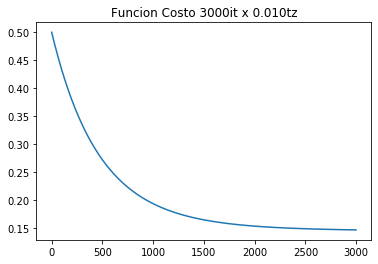

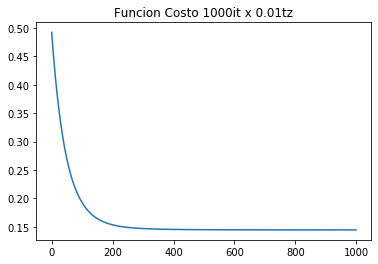

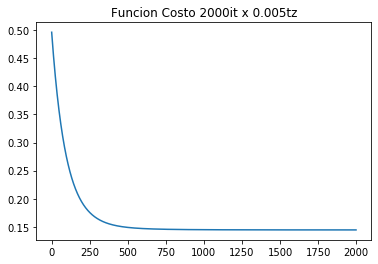

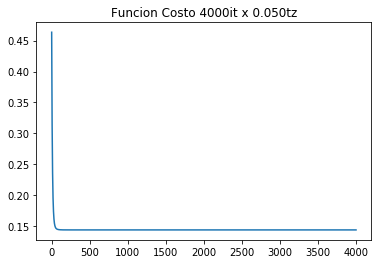

In [329]:
Experimento1()

In [358]:
def Experimento2():
    print("Experimento 2:\n") #Encontrar los valores para θ usando la Ecuacion Normal
    #leemos los datos de entrenamiento y prueba
    train = Leer_Datos(archivos[1] + "_train", ',')
    test = Leer_Datos(archivos[1] + "_test", ',')
    
    train_aux = train[:,1:-2]
    test_aux = test[:,1:-2]
    
    #Normalizamos los datos
    train_nor = Normalizar_Datos(train_aux)
    test_nor = Normalizar_Datos(test_aux)
    
    train_nor = np.c_[train_nor, train[:,7:]]
    test_nor = np.c_[test_nor, test[:,7:]]
    
    #dividimos en X & y
    X_train = train_nor[:,:-1]
    y_train = train_nor[:,-1:]
    X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
    
    X_test = test_nor[:,:-1]
    y_test = test_nor[:,-1:]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]
    
    #Ecuacion Normal
    theta_EN = Ecuacion_Normal(X_train_b, y_train)
    theta_EN = np.reshape(theta_EN,theta_EN.shape[0])
    print(theta_EN)
    
    #Gradiente Descendiente
    iteraciones = range(1000,5001,1000)
    tasas_aprendizaje = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]

    y_train = np.reshape(y_train, y_train.shape[0])
    y_test = np.reshape(y_test, y_test.shape[0])
    
    tabla_costos = []
    for it in iteraciones:
        costos = []
        for tasa in tasas_aprendizaje:
            theta_GD = np.zeros(X_train_b.shape[1])
            theta_GD = gradiente_descendiente(X_train_b, y_train, theta_GD, it, tasa)[0]
            costo_train = calcular_costo(X_train_b, y_train, theta_GD)
            costos.append(costo_train)
        tabla_costos.append(costos)
    tabla_costos = pd.DataFrame(tabla_costos, columns=tasas_aprendizaje, index=iteraciones)
    print(tabla_costos)
    
    #plotear
    theta_GD = np.zeros(X_train_b.shape[1])
    costos = gradiente_descendiente(X_train_b, y_train, theta_GD, 1000, 0.01)[1]
    plt.title("Admission_Predict")
    plt.plot(costos)
    plt.show()
    
    #prediccion
    pred = np.dot(X_train_b,theta_EN)
    print(pred)
    plt.title("Admission_Predict2")
    plt.plot(pred, y_train,'ro')
    theta_EN = np.flip(theta_EN)
    polinomio1 = np.poly1d(theta_EN)
    print(polinomio1(0))
    #plt.plot(y_train,polinomio1(y_train))

Experimento 2:

[ 0.71771664  0.02126641  0.01685984  0.00923939 -0.0055067   0.02533703
  0.06885748  0.02031833]
         0.001     0.005     0.010     0.050     0.100     0.200
1000  0.026431  0.004650  0.002871  0.002193  0.002193  0.002193
2000  0.008821  0.002872  0.002250  0.002193  0.002193  0.002193
3000  0.006446  0.002388  0.002198  0.002193  0.002193  0.002193
4000  0.005396  0.002251  0.002194  0.002193  0.002193  0.002193
5000  0.004651  0.002210  0.002193  0.002193  0.002193  0.002193


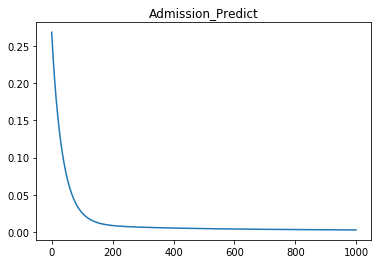

[0.94714841 0.80511996 0.65055694 0.72439784 0.63141708 0.85505415
 0.71114409 0.60187577 0.53134377 0.70656642 0.7304977  0.83683867
 0.85302923 0.62789185 0.61871393 0.63258321 0.70140226 0.64177991
 0.72316307 0.64123151 0.59707658 0.68602678 0.92696503 0.95525595
 0.94755371 0.9604201  0.75510611 0.51465329 0.41517755 0.48197004
 0.59074871 0.71148859 0.92854992 0.93222874 0.9616592  0.86076989
 0.65125963 0.53279636 0.48002891 0.57650621 0.63533975 0.64275874
 0.6631338  0.83695201 0.87758015 0.82434568 0.90576307 0.93272506
 0.81478654 0.75885621 0.69432962 0.62096111 0.70535189 0.67293726
 0.65807104 0.58592267 0.54668591 0.48033633 0.40964906 0.61045838
 0.59546831 0.60839623 0.63199597 0.68699318 0.7472798  0.78058631
 0.78201844 0.72211832 0.82060272 0.85121672 0.9561223  0.96068825
 0.89428819 0.79190804 0.77893748 0.779187   0.76211104 0.56313683
 0.48449416 0.43461602 0.63956646 0.95243241 0.84879045 0.88821415
 0.92916676 0.70874546 0.67404544 0.64777722 0.64541694 0.7517

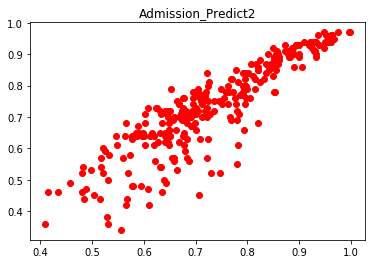

In [359]:
Experimento2()